In [1]:
import numpy as np
class LogisticRegression(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def logit(p):
        return np.log(p/(1-p))
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.sigmoid(net_input)
            errors = y - output
            self.w_[1:] += self.eta * np.dot(errors, X)  # differenciation of 
            self.w_[0] += self.eta * errors.sum()
            cost = -y.dot(np.log(output)) -((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:].T) + self.w_[0]
    def sigmoid(self, X):
        return np.exp(X)/(1+np.exp(X))
    def probability(self, X):
        return self.sigmoid(self.net_input(X))
    def predict(self, X):
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, 0)
    def get_parameter(self):
        return self.w_

In [2]:
class MultiLogisticRegression(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  
        self.n_iter = n_iter 
        self.random_state = random_state 
    def fit(self, X, y):
        self.classes = np.unique(y.tolist())
        self.lgrs = []
        for class_ in self.classes:
            y_temp = np.where(y == class_, 1, 0)
            # print(y_temp)
            self.lgrs.append(LogisticRegression(eta=self.eta, n_iter=self.n_iter))
            self.lgrs[class_].fit(X, y_temp)
    def predict(self, X):
        f = []
        for lgr in self.lgrs:
            f.append(lgr.probability(X))
        return self.classes[np.argmax(f, axis=0)]

In [3]:
import pandas as pd  
df_trainX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_train.csv", header=0, error_bad_lines=False)
df_trainy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_train.csv", header=0, error_bad_lines=False)
df_testX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_test.csv", header=0, error_bad_lines=False)
df_testy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_test.csv", header=0, error_bad_lines=False)
X_train = df_trainX.iloc[:].values
y_train = df_trainy.iloc[:, 0].values 
X_test = df_testX.iloc[:].values
y_test = df_testy.iloc[:, 0].values

markers = ('o', 'x', 's', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
labels = ('Versicolour', 'Virginica', 'Setosa')

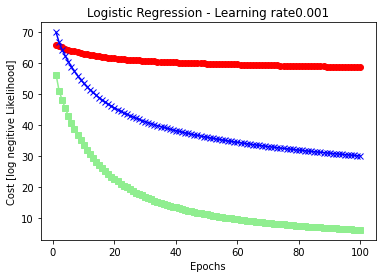

10

In [6]:
import matplotlib.pyplot as plt
lgr=MultiLogisticRegression(n_iter=100, eta=0.001)
lgr.fit(X_train, y_train)
for class_ in lgr.classes:
    plt.plot(range(1, len(lgr.lgrs[class_].cost_)+1), lgr.lgrs[class_].cost_, marker=markers[class_], color=colors[class_], label=labels[class_])
    plt.xlabel('Epochs')
    plt.ylabel('Cost [log negitive Likelihood]')
    plt.title('Logistic Regression - Learning rate'+str(0.001))
plt.show()
y_pred = lgr.predict(X_test)
test_error=(y_test!=y_pred).sum()
y_pred = lgr.predict(X_train)
train_error=(y_train!=y_pred).sum()
train_error

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


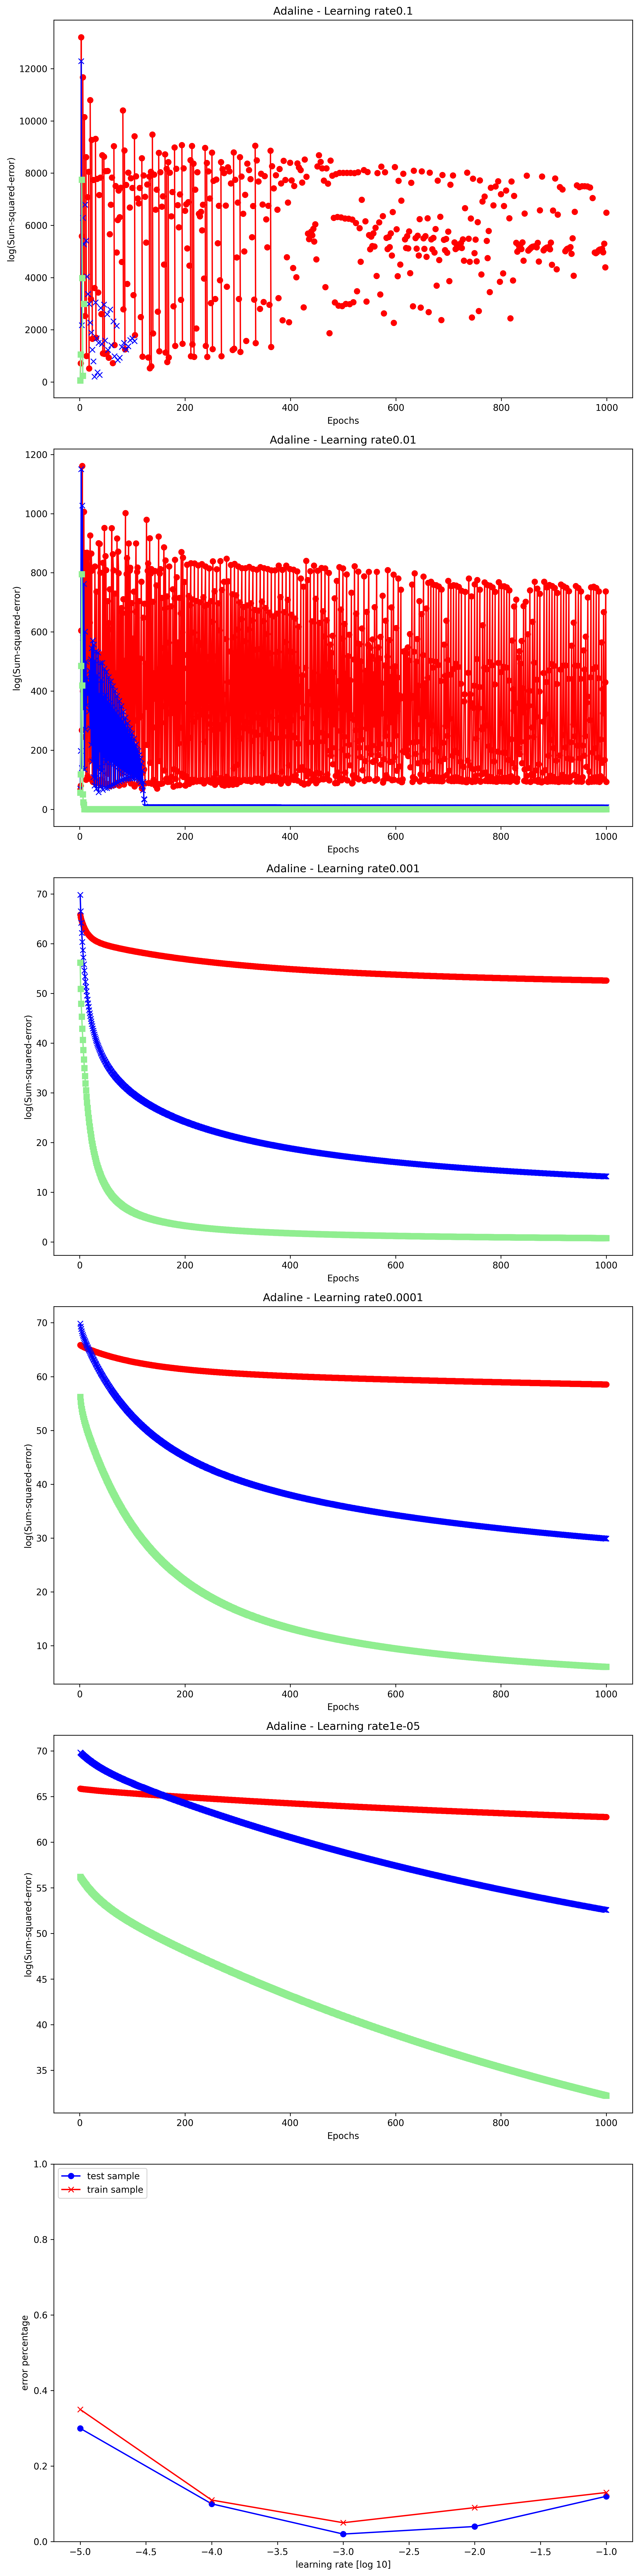

In [9]:
import matplotlib.pyplot as plt
rows, cols = 5, 1
fig, ax = plt.subplots(nrows=rows+1, ncols=cols, figsize=(10*cols, 8*rows))
etas = []
lgr = []
test_error = []
train_error = []
for i in range(rows*cols):
    etas.append(10**(-1-i))
for i in range(rows*cols):
    lgr.append(MultiLogisticRegression(n_iter=1000, eta=etas[i]))
    lgr[i].fit(X_train, y_train)
    for class_ in lgr[i].classes:
        ax[i].plot(range(1, len(lgr[i].lgrs[class_].cost_)+1), lgr[i].lgrs[class_].cost_, marker=markers[class_], color=colors[class_], label=labels[class_])
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('log(Sum-squared-error)')
        ax[i].set_title('Adaline - Learning rate'+str(etas[i]))
        # ax[i//cols][i%cols].legend(loc='upper left')
    y_pred = lgr[i].predict(X_test)
    test_error.append((y_test!=y_pred).sum()/len(y_test))
    y_pred = lgr[i].predict(X_train)
    train_error.append((y_train!=y_pred).sum()/len(y_train))

ax[-1].set_xlabel('learning rate [log 10]')
ax[-1].set_ylabel('error percentage')
ax[-1].set_ylim(0, 1)
ax[-1].plot(np.log10(etas), test_error, marker='o', color='blue', label='test sample')
ax[-1].plot(np.log10(etas), train_error, marker='x', color='red', label='train sample')
ax[-1].legend(loc='upper left')
plt.tight_layout()  # auto adjust the layout of whole picture
plt.show()

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x0_min, x0_max = X[:, 0].min()-1, X[:, 0].max()+1
    x1_min, x1_max = X[:, 1].min()-1, X[:, 1].max()+1
    x2_min, x2_max = X[:, 2].min()-1, X[:, 2].max()+1
    x3_min, x3_max = X[:, 3].min()-1, X[:, 3].max()+1
    xx0, xx1, xx2, xx3 = np.meshgrid(np.arange(x0_min, x0_max, resolution), np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution), np.arange(x3_min, x3_max, resolution))
    Z = classifier.predict(np.array([xx0.ravel(), xx1.ravel(), xx2.ravel(), xx3.ravel()]).T) 
    Z = Z.reshape(xx0.shape)
    # print(Z[:, :, 0, 0], xx0, xx1)
    plt.contourf(xx0[:, :, 15, 0], xx1[:, :, 15, 0], Z[:, :, 15, 0], alpha=0.3, cmap=cmap)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=0.5, linewidth=1, marker='o', s=100, label='test set')

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


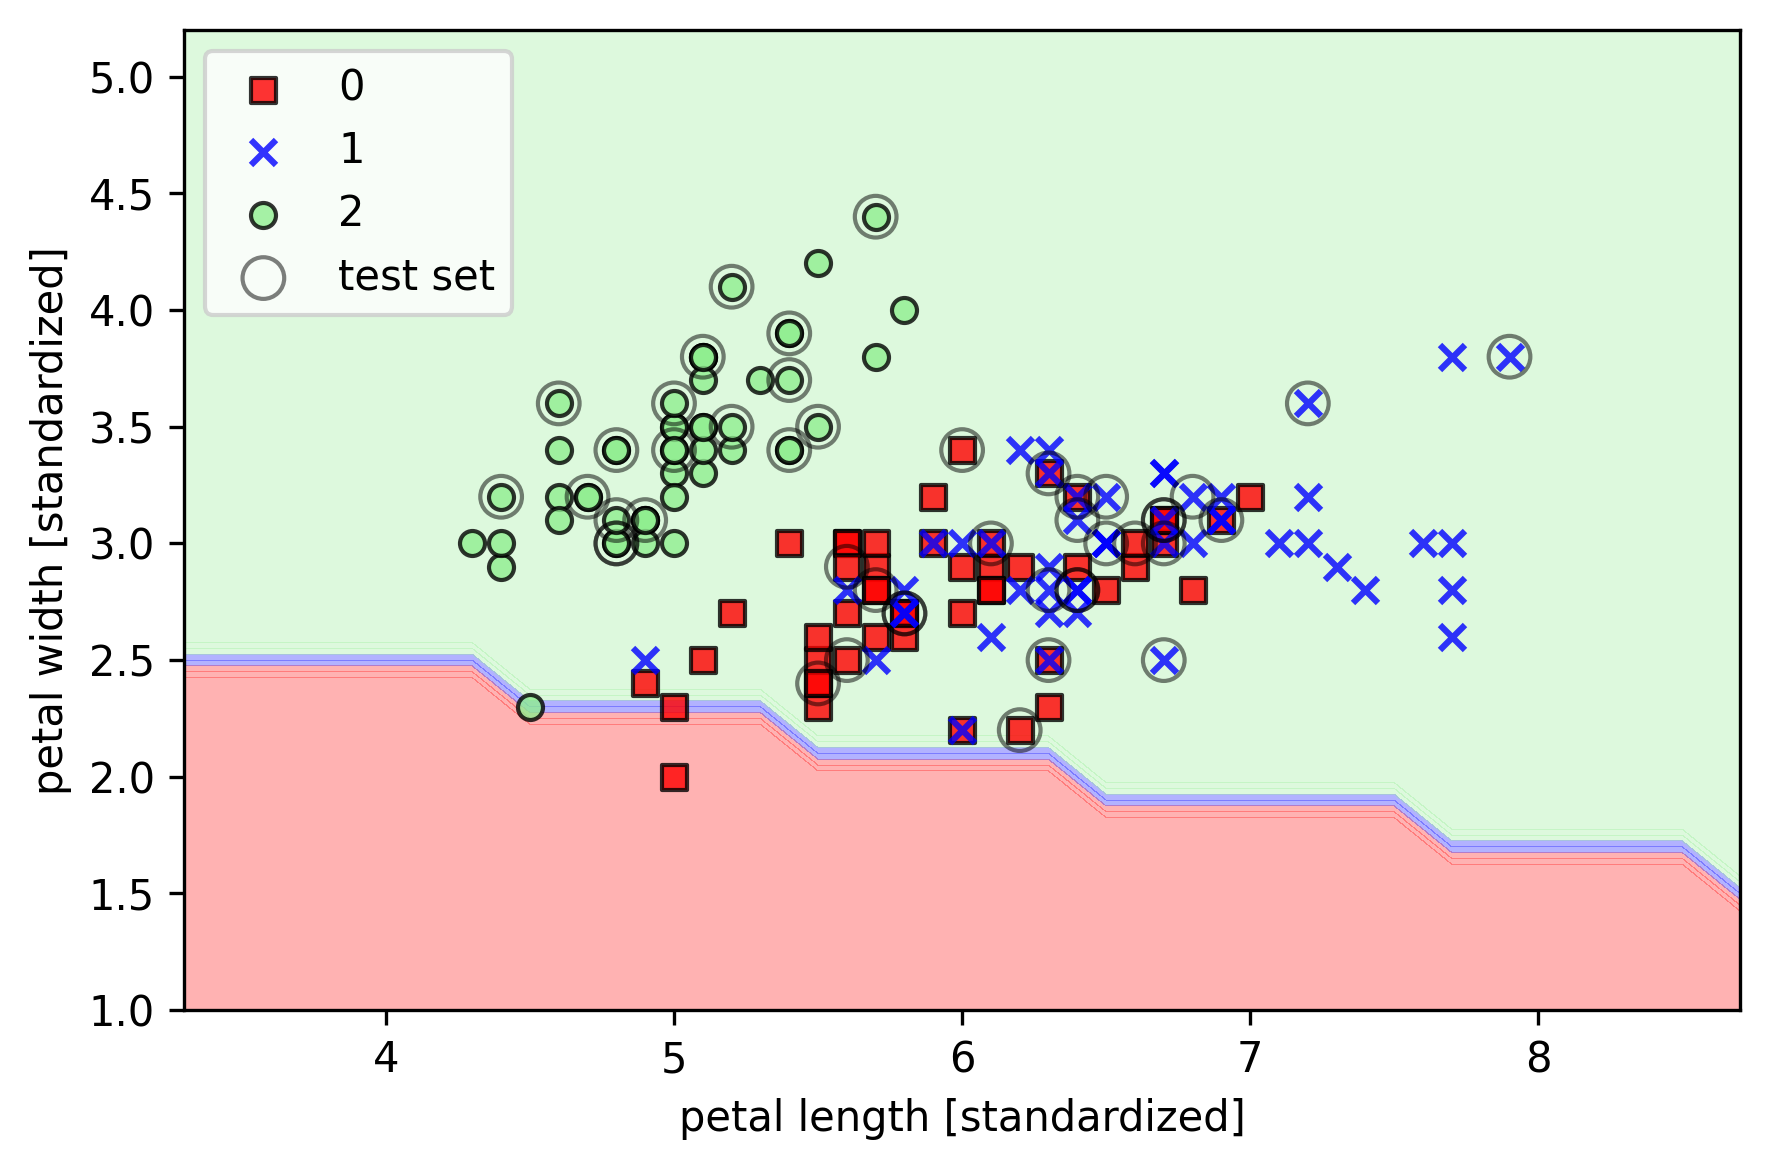

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=lgr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()